# Customizing your Workbench with Pip

You can use `pip` to install Python packages.
With `pip`, you can customize your workbench, by installing libraries (or versions) that are initially not included in the workbench.

To run pip in a workbench, you have three options:

* Open a terminal and run the `pip` command as usual.
* In a notebook file, use the `!` prefix
* In a notebook file, use the `%` prefix

## The `!` prefix

The `!` prefix allows you to run a shell command in a code cell.
For example:

In [1]:
!pwd

/home/jairamir/Desarrollo/rhods-qc-apps/1.intro/chapter3/customize


When you use the `!` prefix, Juypter lab launches the given command in a separate process.

## The `%` Prefix

By using the `%` prefix, you can run _magic commands_, which are special Juypter/IPython commands.
There are several commands available, such as `%pip`, `%alias`, or `%env`.
For a complete list, see https://ipython.readthedocs.io/en/stable/interactive/magics.html

You can run `pip` by using either prefix.

## Listing Installed Packages

List the installed packages in this workbench by using the `pip list` command:

In [6]:
%pip list

Package            Version
------------------ -------
asttokens          2.4.0
backcall           0.2.0
comm               0.1.4
debugpy            1.8.0
decorator          5.1.1
exceptiongroup     1.1.3
executing          2.0.0
importlib-metadata 6.8.0
ipykernel          6.25.2
ipython            8.16.1
jedi               0.19.1
jupyter-client     8.4.0
jupyter-core       5.4.0
matplotlib-inline  0.1.6
nest-asyncio       1.5.8
packaging          23.2
parso              0.8.3
pexpect            4.8.0
pickleshare        0.7.5
pip                20.2.4
platformdirs       3.11.0
prompt-toolkit     3.0.39
psutil             5.9.6
ptyprocess         0.7.0
pure-eval          0.2.2
Pygments           2.16.1
python-dateutil    2.8.2
pyzmq              25.1.1
setuptools         50.3.2
six                1.16.0
stack-data         0.6.3
tornado            6.3.3
traitlets          5.11.2
typing-extensions  4.8.0
wcwidth            0.2.8
zipp               3.17.0
You should consider upgrading via t

## Installing a Package

Assume that you want to use the `seaborn` package to plot better graphics.

However, the package is not installed in this workbench.

Install the package with `pip`.

In [7]:
%pip install seaborn

  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
     |████████████████████████████████| 11.6 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 12.3 MB 140.5 MB/s eta 0:00:01    |█████████████████████▌          | 8.3 MB 140.5 MB/s eta 0:00:01
     |████████████████████████████████| 18.2 MB 125.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 111.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 119.3 MB/s eta 0:00:01
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
     |████████████████████████████████| 301 kB 142.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 129.1 MB/s eta 0:00:01
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
You should consider upgrading via the '/home/jairamir/Desarrollo/rhods-qc-apps/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Now that `seaborn` is installed in the workbench, you can use it.

First, import the package:

In [8]:
import seaborn

Now, use the package to build and plot a graphic:

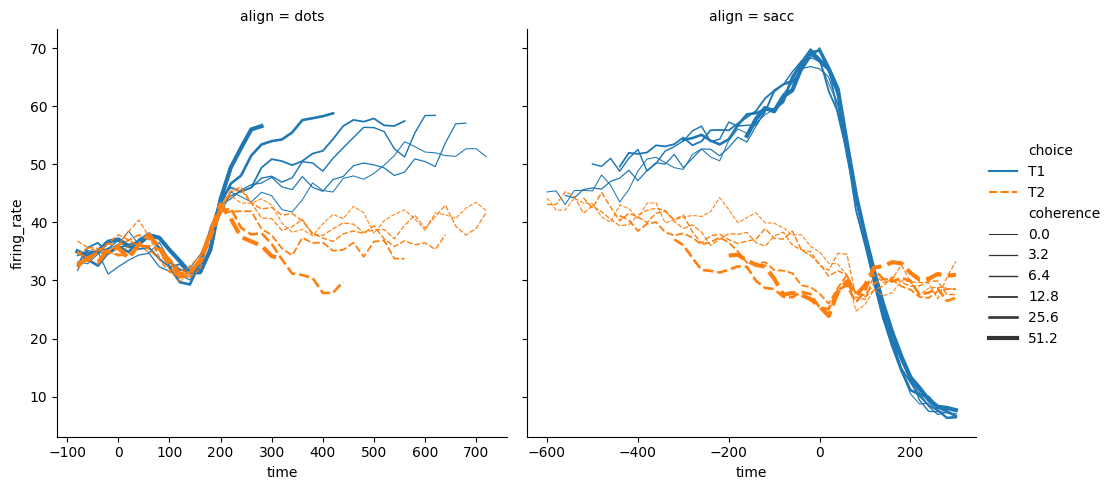

In [12]:
# load an example dataset
dots = seaborn.load_dataset("dots")

# plot
seaborn.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)